Copyright (c) MONAI Consortium  
Licensed under the Apache License, Version 2.0 (the "License");  
you may not use this file except in compliance with the License.  
You may obtain a copy of the License at  
&nbsp;&nbsp;&nbsp;&nbsp;http://www.apache.org/licenses/LICENSE-2.0  
Unless required by applicable law or agreed to in writing, software  
distributed under the License is distributed on an "AS IS" BASIS,  
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.  
See the License for the specific language governing permissions and  
limitations under the License.

# Your Tutorial Title

## Setup environment

In [1]:
!python -c "import monai" || pip install -q "monai-weekly[pillow]"
!python -c "import matplotlib" || pip install -q matplotlib
%matplotlib inline

## Setup imports

In [2]:
import os
import shutil
import tempfile

import matplotlib.pyplot as plt
from monai.config import print_config
from monai.transforms import LoadImage

from example_class import ExampleImageGenerator

print_config()

MONAI version: 1.1.0+2.g97918e46
Numpy version: 1.22.2
Pytorch version: 1.13.0a0+d0d6b1f
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 97918e46e0d2700c050e678d72e3edb35afbd737
MONAI __file__: /workspace/monai/monai-in-dev/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.10
Nibabel version: 4.0.2
scikit-image version: 0.19.3
Pillow version: 9.0.1
Tensorboard version: 2.10.1
gdown version: 4.6.0
TorchVision version: 0.14.0a0
tqdm version: 4.64.1
lmdb version: 1.3.0
psutil version: 5.9.2
pandas version: 1.4.4
einops version: 0.6.0
transformers version: 4.21.3
mlflow version: 2.0.1
pynrrd version: 1.0.0

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



## Setup data directory

You can specify a directory with the `MONAI_DATA_DIRECTORY` environment variable.  
This allows you to save results and reuse downloads.  
If not specified a temporary directory will be used.

In [3]:
directory = os.environ.get("MONAI_DATA_DIRECTORY")
root_dir = tempfile.mkdtemp() if directory is None else directory
print(root_dir)

/workspace/data


## Your tutorial code and result

### Example code
Here we use the `ExampleImageGenerator` in the `example_class.py` to synethesize 2D images. 

In [4]:
generator = ExampleImageGenerator()
images, _ = generator.generate(root_dir)
im_data = LoadImage(image_only=True)(images)

### Check data shape and visualize

Printing the shape of the data and plotting would help readers better understand the inputs/outputs

torch.Size([40, 128, 128])


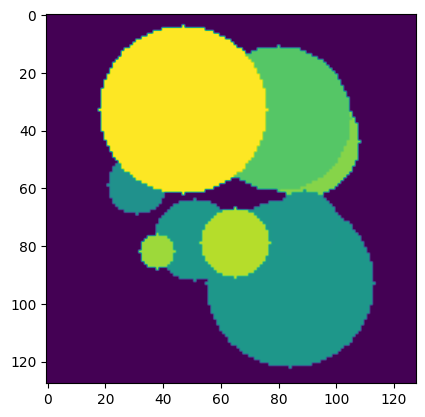

In [5]:
print(im_data.shape)
plt.imshow(im_data[0])
plt.show()

## Cleanup data directory

Remove directory if a temporary was used.

In [6]:
if directory is None:
    shutil.rmtree(root_dir)